In [290]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [291]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from scipy.stats.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

**Importing the dataset**

In [292]:
df=pd.read_csv('/content/drive/MyDrive/Task7/Assignment11_to_16/Social_Network_Ads.csv')

In [293]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**EDA**

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Purchased vs Not Purchased Count**

In [295]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Purchased vs Not Purchased Count at Gender Level**

In [296]:
pd.crosstab(df['Gender'],df['Purchased'])

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


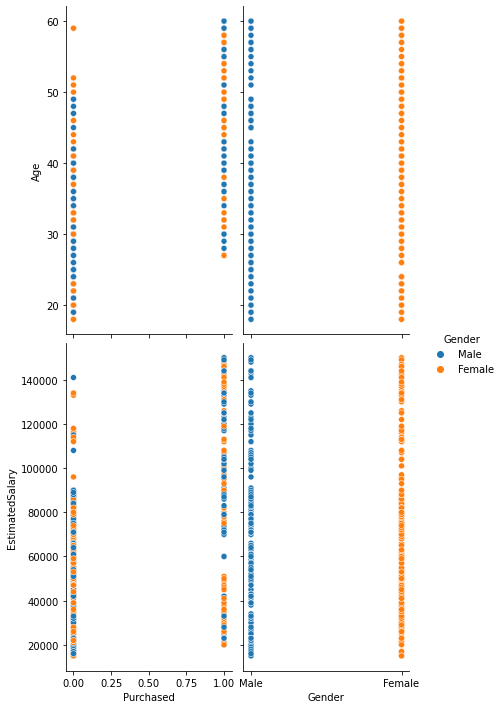

In [297]:
sns.pairplot(
    df,
    x_vars=['Purchased','Gender'],
    y_vars=['Age','EstimatedSalary'],hue='Gender',size=5, aspect=0.6
)

**Find missing values & Replace**

In [298]:
flag=False
for elem in ['Age','EstimatedSalary']:
  val=df[df[elem]==0].values
  val=len(val)
  if val > 0:
    flag=True
    print(elem,val)
    
if flag == False:
  print('There is no Zero value so no need to replace')    

There is no Zero value so no need to replace


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is no Null values so no need to replace



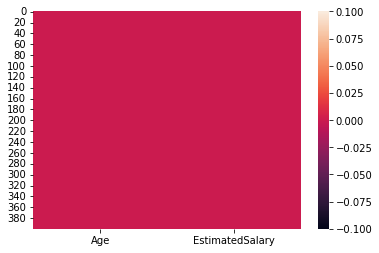

In [299]:
print(df.isnull().sum())
sns.heatmap(df[['Age','EstimatedSalary']].isnull())
print('\nThere is no Null values so no need to replace\n')

In [300]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [301]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [302]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


**Feature Scaling**

In [303]:
mmscaler=MinMaxScaler()
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.transform(x_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [304]:
LOR_Model=LogisticRegression(max_iter=500)
LOR_Model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

**Step 3 | Predection**

In [305]:
y_pred=LOR_Model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Accuracy Score**

In [306]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy Score : ',acc_score)

Accuracy Score :  0.875


**Making the Confusion Matrix**

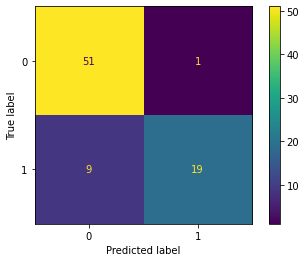

In [307]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix =confusion_matrix(y_test, y_pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.show()

*   51 - Will Purchase (when the actual value is Positive and predicted is also Positive.)
*   1  - Will Purchase (When the actual is negative but prediction is Positive.)
*   9  - Will not Purchase ( When the actual is Positive but the prediction is Negative.)
*   19 - Will not Purchase (when the actual value is Negative and prediction is also Negative.)



**Classification Report**

In [308]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



**Correlation**

In [309]:
print('correlation coefficient :','{:.2f}'.format(df['Age'].corr(df['EstimatedSalary'])))
p_val=pearsonr(df['Age'],df['EstimatedSalary'])
print('pearsonr values :','[{:.2f},'.format(p_val[0]),'{:.3f}]'.format(p_val[1]))

correlation coefficient : 0.16
pearsonr values : [0.16, 0.002]


**The correlation coefficient is 0.16 and the two-tailed  p-value is 0.001 . Since this p-value is less than .05, we would conclude that there is a statistically significant correlation between the two variables**

**Visualization**

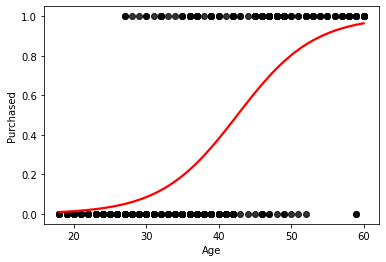

In [310]:
sns.regplot(df['Age'], df['Purchased'], data=df, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


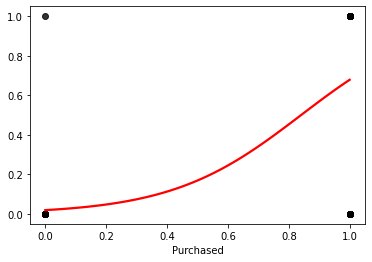

In [311]:
#sns.scatterplot(df['Age'],df['Purchased'])


sns.regplot(y_test, y_pred, data=df, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


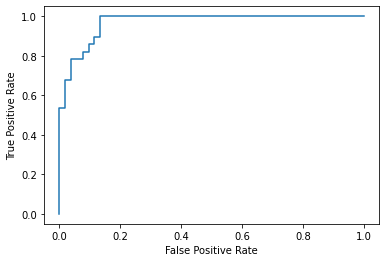

In [312]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(x_train, y_train)
y_score = clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


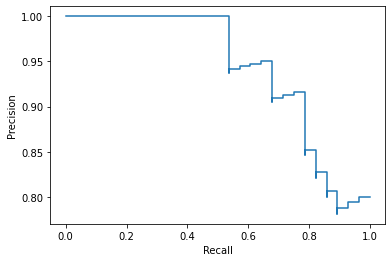

In [313]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()